## LOAD DATA - VEHICLE AND NON - VEHICLE

In [1]:
#1st Code Cell
###############


import os
import glob

# Create two list - for cars and non-cars
cars = []
notcars =[]


# Append car image data to Car list
vehicle_dir = 'vehicles/'
vehicle_types = os.listdir(vehicle_dir)

#print (vehicle_types) # for test purpose

for i in vehicle_types :
    cars.extend(glob.glob(vehicle_dir+i+'/*'))
print ("Total Number of CAR IMAGES found:", len(cars))

# Append non-car image data to noncar list
non_vehicle_dir = 'non-vehicles/'
non_vehicle_types = os.listdir(non_vehicle_dir)

#print (non_vehicle_types) # for test purpose

for i in non_vehicle_types :
    notcars.extend(glob.glob(non_vehicle_dir+i+'/*'))
print ("Total Number of NON VEHCILE CAR IMAGES found:", len(notcars))

Total Number of CAR IMAGES found: 8792
Total Number of NON VEHCILE CAR IMAGES found: 8968


In [2]:
#2nd Code Cell
###############

# Import libraries for plotting , skimage (for HOG implementation) , sklearn (classification)
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog

EXPLANATION ::: 
get_hog_feature function takes image as input , number of orientations (9 is a good number as per HOG implemenation) , 
number of pixels per cell , number of cells for each block . It uses hog function (a function of skimage.feature library)
and outputs the feature vector. If visualization is set to true then this function this also ouput hog feature image

In [3]:
#3rd Code Cell
###############

# Define a function to return HOG features and visualization

def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                       visualise=vis, feature_vector=feature_vec)
        return features

## HOG FEATURES DISPLAY

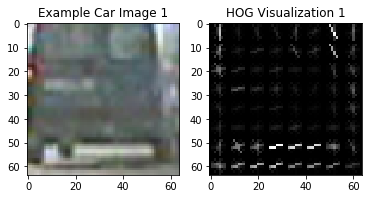

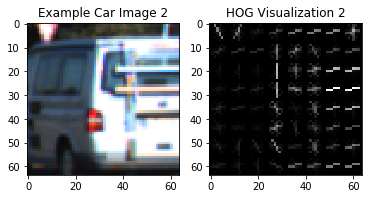

In [4]:
#4th Code Cell
###############


# Generate a random index to look at a car image
ind1 = np.random.randint(0, len(cars))
ind2 = np.random.randint(0, len(cars))

# Read in the image
image1 = mpimg.imread(cars[ind1])
gray1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)

image2 = mpimg.imread(cars[ind2])
gray2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)


# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
features1, hog_image1 = get_hog_features(gray1, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)

features2, hog_image2 = get_hog_features(gray2, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)



# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(image1, cmap='gray')
plt.title('Example Car Image 1')
plt.subplot(122)
plt.imshow(hog_image1, cmap='gray')
plt.title('HOG Visualization 1')
plt.show()


fig = plt.figure()
plt.subplot(121)
plt.imshow(image2, cmap='gray')
plt.title('Example Car Image 2')
plt.subplot(122)
plt.imshow(hog_image2, cmap='gray')
plt.title('HOG Visualization 2')
plt.show()

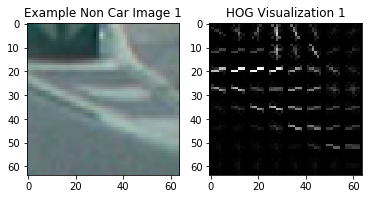

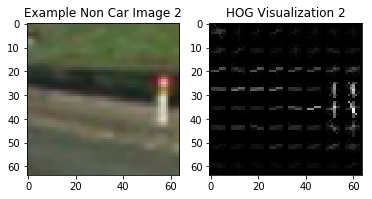

In [5]:
#5th Code Cell
###############


# Generate a random index to look at a car image
ind3 = np.random.randint(0, len(notcars))
ind4 = np.random.randint(0, len(notcars))

# Read in the image
image3 = mpimg.imread(notcars[ind3])
gray3 = cv2.cvtColor(image3, cv2.COLOR_RGB2GRAY)

image4 = mpimg.imread(notcars[ind4])
gray4 = cv2.cvtColor(image4, cv2.COLOR_RGB2GRAY)


# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
features3, hog_image3 = get_hog_features(gray3, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)

features4, hog_image4 = get_hog_features(gray4, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)



# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(image3, cmap='gray')
plt.title('Example Non Car Image 1')
plt.subplot(122)
plt.imshow(hog_image3, cmap='gray')
plt.title('HOG Visualization 1')
plt.show()


fig = plt.figure()
plt.subplot(121)
plt.imshow(image4, cmap='gray')
plt.title('Example Non Car Image 2')
plt.subplot(122)
plt.imshow(hog_image4, cmap='gray')
plt.title('HOG Visualization 2')
plt.show()

YCrCb - is hyperparameter we are going to use to train our model 

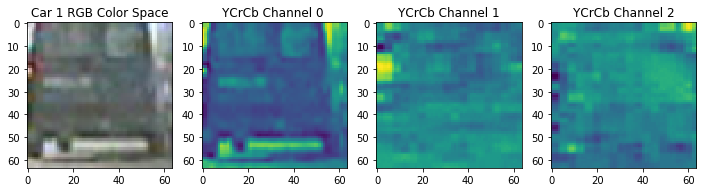

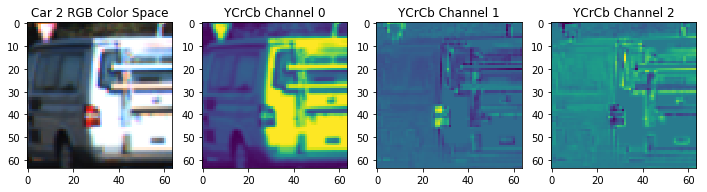

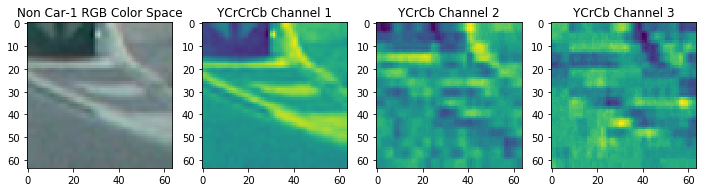

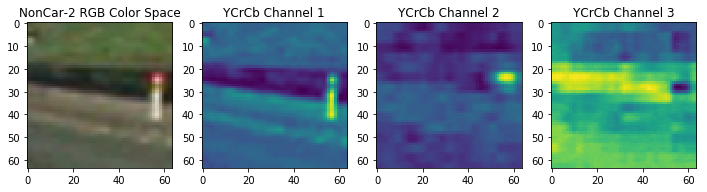

In [6]:
#6th Code Cell
###############


car_1_YCrCb = cv2.cvtColor(image1, cv2.COLOR_RGB2YCrCb)
car_2_YCrCb = cv2.cvtColor(image2, cv2.COLOR_RGB2YCrCb)
noncar_1_YCrCb = cv2.cvtColor(image3, cv2.COLOR_RGB2YCrCb)
noncar_2_YCrCb = cv2.cvtColor(image4, cv2.COLOR_RGB2YCrCb)

f, (a1, a2, a3, a4) = plt.subplots(1, 4, figsize=(12,12))
a1.imshow(image1)
a1.set_title('Car 1 RGB Color Space', fontsize=12)
a2.imshow(car_1_YCrCb[:,:,0])
a2.set_title('YCrCb Channel 0 ', fontsize=12)
a3.imshow(car_1_YCrCb[:,:,1])
a3.set_title('YCrCb Channel 1', fontsize=12)
a4.imshow(car_1_YCrCb[:,:,2])
a4.set_title('YCrCb Channel 2', fontsize=12)

f, (a1, a2, a3, a4) = plt.subplots(1, 4, figsize=(12,12))
a1.imshow(image2)
a1.set_title('Car 2 RGB Color Space', fontsize=12)
a2.imshow(car_2_YCrCb[:,:,0])
a2.set_title('YCrCb Channel 0', fontsize=12)
a3.imshow(car_2_YCrCb[:,:,1])
a3.set_title('YCrCb Channel 1', fontsize=12)
a4.imshow(car_2_YCrCb[:,:,2])
a4.set_title('YCrCb Channel 2', fontsize=12)

f, (a1, a2, a3, a4) = plt.subplots(1, 4, figsize=(12,12))
a1.imshow(image3)
a1.set_title('Non Car-1 RGB Color Space', fontsize=12)
a2.imshow(noncar_1_YCrCb[:,:,0])
a2.set_title('YCrCrCb Channel 1', fontsize=12)
a3.imshow(noncar_1_YCrCb[:,:,1])
a3.set_title('YCrCb Channel 2', fontsize=12)
a4.imshow(noncar_1_YCrCb[:,:,2])
a4.set_title('YCrCb Channel 3', fontsize=12)

f, (a1, a2, a3, a4) = plt.subplots(1, 4, figsize=(12,12))
a1.imshow(image4)
a1.set_title('NonCar-2 RGB Color Space', fontsize=12)
a2.imshow(noncar_2_YCrCb[:,:,0])
a2.set_title('YCrCb Channel 1', fontsize=12)
a3.imshow(noncar_2_YCrCb[:,:,1])
a3.set_title('YCrCb Channel 2', fontsize=12)
a4.imshow(noncar_2_YCrCb[:,:,2])
a4.set_title('YCrCb Channel 3', fontsize=12)
plt.show()

bin_spatial function --> Define a function which takes input as an image , resize it using cv2.resize method
and then converts into into 1-D using ravel() function . Finally it returns the 
horizontal stacking of all 3 color channel using np.hstack which will be used to make a feature vector

In [8]:
#7th Code Cell
###############


def bin_spatial(img, size=(32, 32)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))
                        


FUNCTION color_hist ->  this function takes "image" and "number of bins" as input and for each channel
it creates an historgam . It then concatenates all the channels and returns a feature vector

In [9]:
#8th Code Cell
###############


def color_hist(img, nbins=32):    
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins)
    # Concatenate features
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

## find_car function for multi-scale seacrh window 
To implement this I used single function find_cars that's able to both extract features and make predictions.
This function extract hog features once and which can be sub-sampled to get all of its overlaying window . 
Each window is defined by a scaling factor and  overlap of each window is in terms of the cell distance . 
I earlier ran this function for [1,1.5,2] but finally got good results with[1.5,2]  i.e.
for multiple scale factor so as to generate multiple-scaled search windows which
is a more robust and efficient way .

In [10]:
#9th Code Cell
###############


# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scales, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)
    
    windows = []
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_BGR2YCrCb)
    
    # run a multi scaled window search for 1.5 and 2 
    for s in scales:  
        if s != 1:
            imshape = ctrans_tosearch.shape
            ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/s), np.int(imshape[0]/s)))

        ch1 = ctrans_tosearch[:,:,0]
        ch2 = ctrans_tosearch[:,:,1]
        ch3 = ctrans_tosearch[:,:,2]

        # Define blocks and steps as above
        nxblocks = (ch1.shape[1] // pix_per_cell)-1
        nyblocks = (ch1.shape[0] // pix_per_cell)-1 
        nfeat_per_block = orient*cell_per_block**2
        # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
        window = 64
        nblocks_per_window = (window // pix_per_cell)-1 
        cells_per_step = 2  # Instead of overlap, define how many cells to step
        nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
        nysteps = (nyblocks - nblocks_per_window) // cells_per_step

        # Compute individual channel HOG features for the entire image
        hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
        
        for xb in range(nxsteps):
            for yb in range(nysteps):
                ypos = yb*cells_per_step
                xpos = xb*cells_per_step
                # Extract HOG for this patch
                hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

                xleft = xpos*pix_per_cell
                ytop = ypos*pix_per_cell

                # Extract the image patch
                subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))

                # Get color features
                spatial_features = bin_spatial(subimg, size=spatial_size)
                hist_features = color_hist(subimg, nbins=hist_bins)

                # Scale features and make a prediction
                test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
                test_prediction = svc.predict(test_features)

                if test_prediction == 1:
                    xbox_left = np.int(xleft*s)
                    ytop_draw = np.int(ytop*s)
                    win_draw = np.int(window*s)
                    cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                    windows.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))

    return draw_img, windows

In [19]:
#10th Code Cell
###############


def visualize(fig, rows, columns, imgs, titles):
    for index, img in enumerate(imgs):
        plt.subplot(rows, columns, index+1)
        plt.title(index+1)
        img_dims = len(img.shape)
        if img_dims < 3:
            plt.imshow(img, cmap='hot')
            plt.title(titles[index])
        else:
            plt.imshow(img)
            plt.title(titles[index])

## Extract feature vector which has spatial features , histogram features , hog features as a 1-D array for an image in that order.

In [11]:
#11th Code Cell
###############

            
def extract_features(imgs, color_space='BGR', spatial_size=(32, 32),
                     hist_bins=32, orient=9,
                     pix_per_cell=8, cell_per_block=2, hog_channel=0,
                     spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = cv2.imread(file)
        image = image.astype(np.float32)
        # apply color conversion if other than 'RGB'
        if color_space != 'BGR':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_BGR2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
        else:
            feature_image = np.copy(image)

        if spatial_feat is True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat is True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat is True:
            # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(
                        feature_image[:, :, channel],
                        orient, pix_per_cell, cell_per_block, vis=False,
                        feature_vec=True))
                hog_features = np.ravel(hog_features)
            else:
                hog_features = get_hog_features(
                    feature_image[:, :, hog_channel], orient,
                    pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

## Threshold function : heatmap and label boxes : To remove MULTIPLE DETECTION AND FALSE POSITIVES

In [12]:
#12th Code Cell
###############

def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap


In [24]:
#13th Code Cell
###############


def draw_labeled_bboxes(img, labels):
    global previous
    global current
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img


In [14]:
#14th Code Cell
###############


def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap

## LIST OF HYPERPARAMETERS USED

In [15]:
#15th Code Cell
###############

# Define feature parameters
color_space = 'YCrCb'  # RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL'  # 0, 1, 2, "ALL"
spatial_size = (32, 32)
hist_bins = 32
spatial_feat = True
hist_feat = True
hog_feat = True

In [16]:
#16th Code Cell
###############

t1 = time.time()

car_features = extract_features(
            cars, color_space=color_space, spatial_size=spatial_size,
            hist_bins=hist_bins, orient=orient, pix_per_cell=pix_per_cell,
            cell_per_block=cell_per_block, hog_channel=hog_channel,
            spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat)

non_car_features = extract_features(
            notcars, color_space=color_space, spatial_size=spatial_size,
            hist_bins=hist_bins, orient=orient, pix_per_cell=pix_per_cell,
            cell_per_block=cell_per_block, hog_channel=hog_channel,
            spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat)

print(round(time.time()-t1, 2), 'Seconds to extract features...')


114.59 Seconds to extract features...


TRAIN SVM CLASSIFIER  
1. Stack car and non car features
2. Apply normalization using Scaler 
3. Split train and test data
4. Apply SVC 
5. Check accuracy of prediction 

In [17]:
#17th Code Cell
###############

from sklearn.model_selection import train_test_split


X = np.vstack((car_features, non_car_features)).astype(np.float64)
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(non_car_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.10, random_state=rand_state)

print('Using: ', orient, 'orientations, ', pix_per_cell,
      'pixels per cell, ', cell_per_block, 'cells per block, ',
      hist_bins, 'histogram bins, and ', spatial_size, 'spatial sampling')
print('Feature vector length: ', len(X_train[0]))

#svc= LinearSVC()  # run 1  
svc= LinearSVC(C=0.00002) # resubmission 

t1 = time.time()
svc.fit(X_train, y_train)

print(round(time.time()-t1, 2), 'Seconds to train SVC...)')
# Check accuracy
print('Test Accuracy: ', round(svc.score(X_test, y_test), 4))

Using:  9 orientations,  8 pixels per cell,  2 cells per block,  32 histogram bins, and  (32, 32) spatial sampling
Feature vector length:  8460
5.76 Seconds to train SVC...)
Test Accuracy:  0.9944


In [29]:
#18th Code Cell
###############


from scipy.ndimage.measurements import label

image_path = 'test_images/*'
test_images = glob.glob(image_path)
heat = []
heat_titles = []
final = []
y_start_stop = (400, 650)
scales = [1.5, 2]

for img in test_images:
    img = cv2.imread(img)
    output_img, windows = find_cars(img, y_start_stop[0], y_start_stop[1], scales, svc, X_scaler, orient,
                                    pix_per_cell, cell_per_block, spatial_size, hist_bins)
    
    heat_map = np.zeros_like(img[:, :, 0])
    heat_map = add_heat(heat_map, windows)
    heat_map = apply_threshold(heat_map, 0)
    heat_map = np.clip(heat_map, 0, 255)
    
    heat.append(output_img)
    heat.append(heat_map)
    heat_titles.append(' ')
    heat_titles.append(' ')
        
    labels = label(heat_map)
    draw_img = draw_labeled_bboxes(np.copy(img), labels)
    final.append(draw_img)
    final.append(heat_map)
    
fig = plt.figure(figsize=(14, 18), dpi=120)
visualize(fig, 6, 2, heat, heat_titles)

fig = plt.figure(figsize=(14, 18), dpi=120)
visualize(fig, 6, 2, final, heat_titles)
plt.show()

In [25]:
#19th Code Cell
###############

previous_frames = []

def pipeline_images(img):
    
    global previous_frames
    output_img, windows = find_cars(img, y_start_stop[0], y_start_stop[1], scales, svc, X_scaler, orient,
                                    pix_per_cell, cell_per_block, spatial_size, hist_bins)
  
    previous_frames.append(windows)
    previous_frames = previous_frames[-14:]
    heat_map = np.zeros_like(img[:, :, 0])
    heat_map = add_heat(heat_map, [window for windows in previous_frames for window in windows])
    heat_map = np.clip(heat_map, 0, 255)
    heat_map = apply_threshold(heat_map, 10)
    labels = label(heat_map)
    draw_img = draw_labeled_bboxes(np.copy(img), labels)
    
    
    return draw_img

In [27]:
#20th Code Cell
###############

from IPython.display import HTML
from moviepy.editor import VideoFileClip
test_output = 'P5_project_output.mp4'
clip = VideoFileClip('project_video.mp4', audio=None)
test_clip = clip.fl_image(pipeline_images)
test_clip.write_videofile(test_output, audio=False)

[MoviePy] >>>> Building video 1stApril_P5_project_output.mp4
[MoviePy] Writing video 1stApril_P5_project_output.mp4


100%|█████████▉| 1260/1261 [10:33<00:00,  1.92it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: 1stApril_P5_project_output.mp4 

